In [ ]:
# webscraped InChI strings of FDA-approved drugs are processed

In [11]:
import pandas as pd
from rdkit import Chem

In [12]:
df = pd.read_csv('../file_import/final_drugs_list.csv')
df.head(3)

,original_entry,Proprietary Name,Active Ingredient/Moiety,InChI
0,0,Lupron,leuprolide acetate,InChI=1S/C59H84N16O12.C2H4O2/c1-6-63-57(86)48-...
1,1,Seldane,terfenadine,"InChI=1S/C32H41NO2/c1-31(2,3)26-18-16-25(17-19..."
2,2,Ridaura,auranofin,InChI=1S/C14H20O9S.C6H15P.Au/c1-6(15)19-5-10-1...


In [13]:
df.columns

Index(['original_entry', 'Proprietary  Name', 'Active Ingredient/Moiety',
       'InChI'],
      dtype='object')

In [14]:
df = df.drop('original_entry', 1)
df.head(3)

,Proprietary Name,Active Ingredient/Moiety,InChI
0,Lupron,leuprolide acetate,InChI=1S/C59H84N16O12.C2H4O2/c1-6-63-57(86)48-...
1,Seldane,terfenadine,"InChI=1S/C32H41NO2/c1-31(2,3)26-18-16-25(17-19..."
2,Ridaura,auranofin,InChI=1S/C14H20O9S.C6H15P.Au/c1-6(15)19-5-10-1...


In [15]:
# adding a SMILES column and apply RDKit function? (maybe adding chemical Formula, )
def inchi_to_smiles(inchi_string):
    x = Chem.MolFromInchi(inchi_string)
    return Chem.MolToSmiles(x)

In [16]:
# calculate Smiles string from each InChI:
df['SMILES'] = df['InChI'].apply(lambda x: inchi_to_smiles(x))

In [21]:
df.head(4)

,Proprietary Name,Active Ingredient/Moiety,InChI,SMILES
0,Lupron,leuprolide acetate,InChI=1S/C59H84N16O12.C2H4O2/c1-6-63-57(86)48-...,CC(=O)O.CCN=C(O)C1CCCN1C(=O)C(CCCNC(=N)N)N=C(O...
1,Seldane,terfenadine,"InChI=1S/C32H41NO2/c1-31(2,3)26-18-16-25(17-19...",CC(C)(C)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3ccc...
2,Ridaura,auranofin,InChI=1S/C14H20O9S.C6H15P.Au/c1-6(15)19-5-10-1...,CC(=O)OC[C@H]1O[C@@H]([S-])[C@H](OC(C)=O)[C@@H...
3,Marinol,dronabinol,InChI=1S/C21H30O2/c1-5-6-7-8-15-12-18(22)20-16...,CCCCCc1cc(O)c2c(c1)OC(C)(C)[C@@H]1CCC(C)=C[C@@...


In [24]:
# calc. Molweight
from rdkit.Chem.Descriptors import MolWt, MolLogP
mol = Chem.MolFromSmiles('CCCCCCCC(=O)OCC(O)CO')
mol_wt = MolWt(mol)
round(mol_wt, 2)

218.29

In [25]:
# calc LogP (lipophilicity, distribution between aqueous and apolar phase)
# water-octanol partition coefficient
mol_logp = MolLogP(mol)
mol_logp

1.2433

In [26]:
# Chemical Formula to Hill Notation
from rdkit.Chem.rdMolDescriptors import CalcMolFormula
formula = CalcMolFormula(mol)
formula

'C11H22O4'

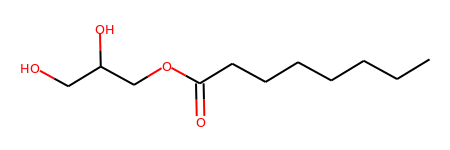

In [31]:
# Information about number of Rings and other substructures:
from rdkit.Chem.rdMolDescriptors import CalcNumRings
coul_mat = CalcNumRings(mol)
mol

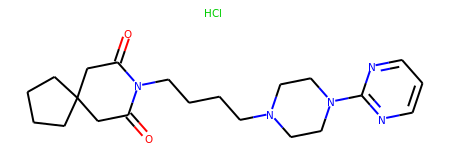

In [63]:
# draw a molecule from the dataset:
num = 30
sel_mol = df.iloc[num]['SMILES']
sel_mol = Chem.MolFromSmiles(sel_mol)
sel_mol

In [66]:
df.to_csv('../file_import/final_drugs_list_with_smiles.csv', index=False)

In [68]:
from rdkit.Chem.GraphDescriptors import BertzCT
compl = BertzCT(mol)
compl

158.66691118104077

In [76]:
# calculate a molecules complexity based on BertzCT (molecular complexity index.):
num = 34
sel_mol = df.iloc[num]['SMILES']
sel_mol = Chem.MolFromSmiles(sel_mol)
from rdkit.Chem.GraphDescriptors import BertzCT
compl = BertzCT(sel_mol)
round(compl, 2)

142.48

In [ ]:
# TPSA (molecular polar surface area)

In [79]:
# H Acceptors (Donors)
df.head(4)

,Proprietary Name,Active Ingredient/Moiety,InChI,SMILES
0,Lupron,leuprolide acetate,InChI=1S/C59H84N16O12.C2H4O2/c1-6-63-57(86)48-...,CC(=O)O.CCN=C(O)C1CCCN1C(=O)C(CCCNC(=N)N)N=C(O...
1,Seldane,terfenadine,"InChI=1S/C32H41NO2/c1-31(2,3)26-18-16-25(17-19...",CC(C)(C)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3ccc...
2,Ridaura,auranofin,InChI=1S/C14H20O9S.C6H15P.Au/c1-6(15)19-5-10-1...,CC(=O)OC[C@H]1O[C@@H]([S-])[C@H](OC(C)=O)[C@@H...
3,Marinol,dronabinol,InChI=1S/C21H30O2/c1-5-6-7-8-15-12-18(22)20-16...,CCCCCc1cc(O)c2c(c1)OC(C)(C)[C@@H]1CCC(C)=C[C@@...


In [80]:
# draw multiple molecules:
# calculate Smiles string from each InChI:
df['mol'] = df['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))
df.head(4)

,Proprietary Name,Active Ingredient/Moiety,InChI,SMILES,mol
0,Lupron,leuprolide acetate,InChI=1S/C59H84N16O12.C2H4O2/c1-6-63-57(86)48-...,CC(=O)O.CCN=C(O)C1CCCN1C(=O)C(CCCNC(=N)N)N=C(O...,<rdkit.Chem.rdchem.Mol object at 0x7f78170a9e90>
1,Seldane,terfenadine,"InChI=1S/C32H41NO2/c1-31(2,3)26-18-16-25(17-19...",CC(C)(C)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3ccc...,<rdkit.Chem.rdchem.Mol object at 0x7f78170a9da0>
2,Ridaura,auranofin,InChI=1S/C14H20O9S.C6H15P.Au/c1-6(15)19-5-10-1...,CC(=O)OC[C@H]1O[C@@H]([S-])[C@H](OC(C)=O)[C@@H...,<rdkit.Chem.rdchem.Mol object at 0x7f78170b4030>
3,Marinol,dronabinol,InChI=1S/C21H30O2/c1-5-6-7-8-15-12-18(22)20-16...,CCCCCc1cc(O)c2c(c1)OC(C)(C)[C@@H]1CCC(C)=C[C@@...,<rdkit.Chem.rdchem.Mol object at 0x7f78170b4260>


In [91]:
from rdkit.Chem import Draw
mols = df['mol'][10:22]

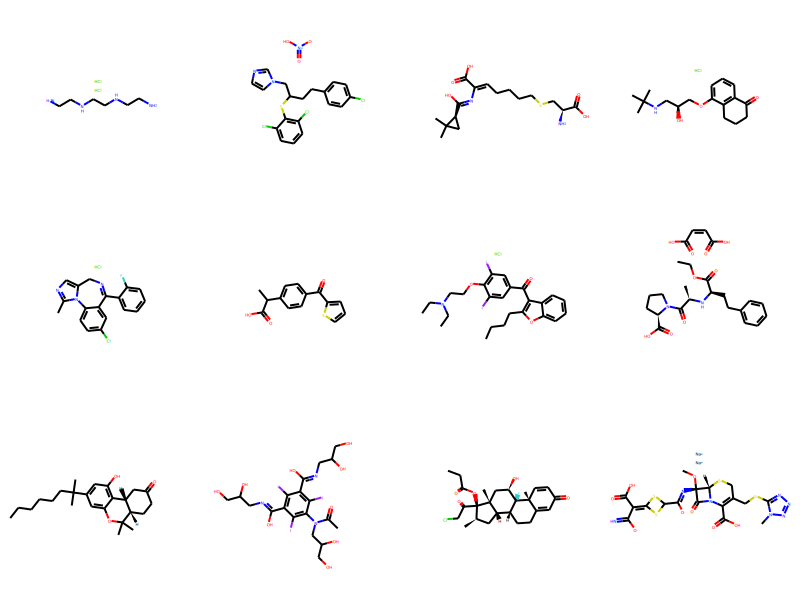

In [92]:
#MolsToGridImage allows to paint a number of molecules at a time
Draw.MolsToGridImage(mols, molsPerRow=4, useSVG=True) # legend can be added: legends=list(df['SMILES'][:20].values)